### Basic Statistics
Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset
Introduction
●To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.
Descriptive Analytics for Numerical Columns
●Objective: To compute and analyze basic statistical measures for numerical columns in the dataset.
●Steps:
Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).
Identify numerical columns in the dataset.
Calculate the mean, median, mode, and standard deviation for these columns.
Provide a brief interpretation of these statistics.
Data Visualization
●Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.
●Histograms:
Plot histograms for each numerical column.
Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.
●Box Plots:
Create boxplots for numerical variables to identify outliers and the interquartile range.
Discuss any findings, such as extreme values or unusual distributions.
●Bar Chart Analysis for Categorical Column:
Identify categorical columns in the dataset.
Create bar charts to visualize the frequency or count of each category.
Analyze the distribution of categories and provide insights.
Conclusion
●Summarize the key findings from the descriptive analytics and data visualizations.

In [16]:

# BASIC STATISTICS & VISUALIZATION

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. LOAD THE DATASET

df = pd.read_csv("C:\\Users\\moulika\\Downloads\\sales_data_with_discounts.csv")
print("Dataset loaded successfully!")
print(df.head())
print(df.info())

Dataset loaded successfully!
         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  


In [17]:
# 2. IDENTIFY NUMERICAL & CATEGORICAL COLUMNS


num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("\nNumerical Columns:", list(num_cols))
print("Categorical Columns:", list(cat_cols))




Numerical Columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
Categorical Columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


In [18]:
# 3. DESCRIPTIVE ANALYTICS FOR NUMERICAL COLUMNS


descriptive_stats = df[num_cols].describe().T
descriptive_stats["mode"] = df[num_cols].mode().iloc[0]

print("\nDescriptive Statistics for Numerical Columns:\n")
print(descriptive_stats)

# OPTIONAL: Save to CSV
descriptive_stats.to_csv("descriptive_statistics.csv")



Descriptive Statistics for Numerical Columns:

                   count          mean           std         min          25%  \
Volume             450.0      5.066667      4.231602    1.000000     3.000000   
Avg Price          450.0  10453.433333  18079.904840  290.000000   465.000000   
Total Sales Value  450.0  33812.835556  50535.074173  400.000000  2700.000000   
Discount Rate (%)  450.0     15.155242      4.220602    5.007822    13.965063   
Discount Amount    450.0   3346.499424   4509.902963   69.177942   460.459304   
Net Sales Value    450.0  30466.336131  46358.656624  326.974801  2202.208645   

                           50%           75%            max          mode  
Volume                4.000000      6.000000      31.000000      3.000000  
Avg Price          1450.000000  10100.000000   60100.000000    400.000000  
Total Sales Value  5700.000000  53200.000000  196400.000000  24300.000000  
Discount Rate (%)    16.577766     18.114718      19.992407      5.007822  
Disc

In [19]:
# 4. BRIEF INTERPRETATION (Print Statements)


print("\nINTERPRETATION SUMMARY:")
for col in num_cols:
    skew = df[col].skew()
    print(f"\nColumn: {col}")
    print(f" - Mean: {df[col].mean():.2f}")
    print(f" - Median: {df[col].median():.2f}")
    print(f" - Standard Deviation: {df[col].std():.2f}")
    print(f" - Skewness: {skew:.2f} (Positive = right-skewed, Negative = left-skewed)")



INTERPRETATION SUMMARY:

Column: Volume
 - Mean: 5.07
 - Median: 4.00
 - Standard Deviation: 4.23
 - Skewness: 2.73 (Positive = right-skewed, Negative = left-skewed)

Column: Avg Price
 - Mean: 10453.43
 - Median: 1450.00
 - Standard Deviation: 18079.90
 - Skewness: 1.91 (Positive = right-skewed, Negative = left-skewed)

Column: Total Sales Value
 - Mean: 33812.84
 - Median: 5700.00
 - Standard Deviation: 50535.07
 - Skewness: 1.53 (Positive = right-skewed, Negative = left-skewed)

Column: Discount Rate (%)
 - Mean: 15.16
 - Median: 16.58
 - Standard Deviation: 4.22
 - Skewness: -1.06 (Positive = right-skewed, Negative = left-skewed)

Column: Discount Amount
 - Mean: 3346.50
 - Median: 988.93
 - Standard Deviation: 4509.90
 - Skewness: 1.91 (Positive = right-skewed, Negative = left-skewed)

Column: Net Sales Value
 - Mean: 30466.34
 - Median: 4677.79
 - Standard Deviation: 46358.66
 - Skewness: 1.54 (Positive = right-skewed, Negative = left-skewed)


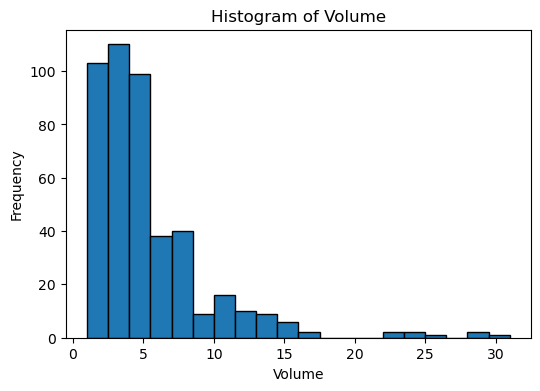

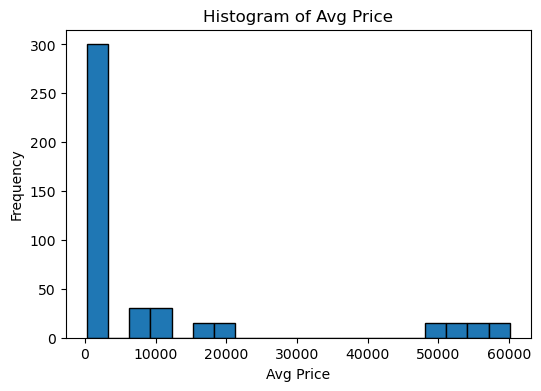

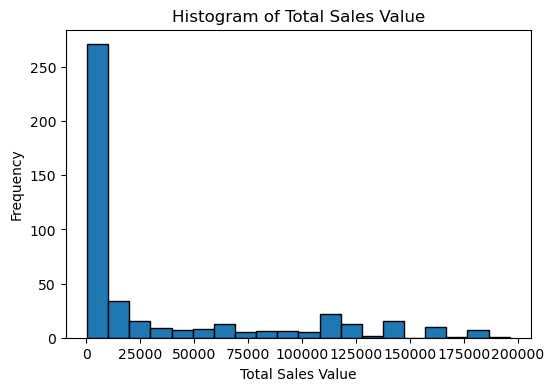

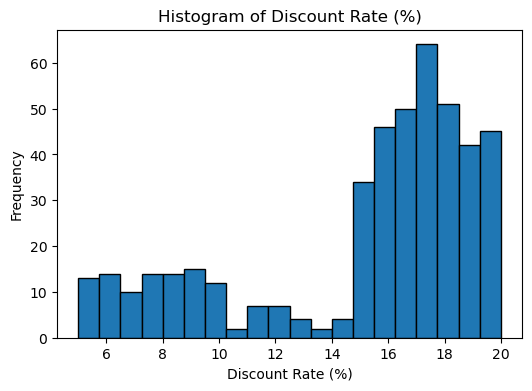

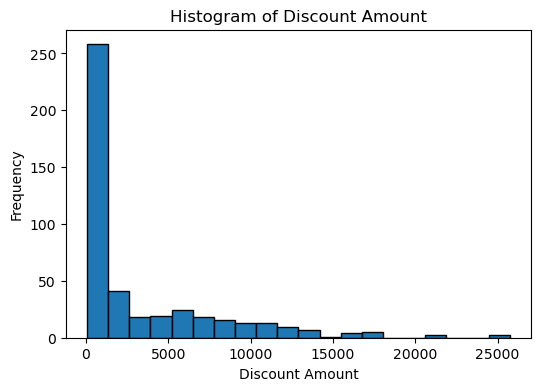

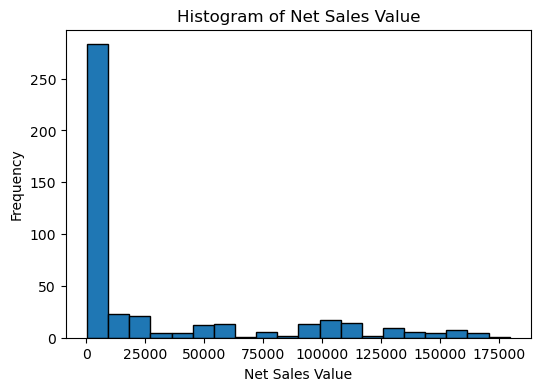

In [20]:
# 5. VISUALIZATION – HISTOGRAMS FOR NUMERIC DATA


for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(False)
    plt.show()

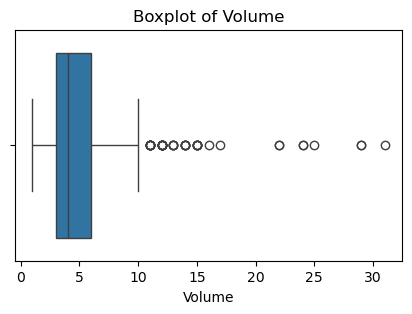

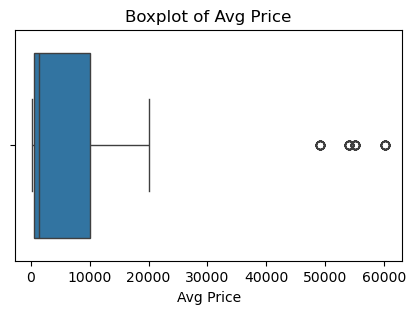

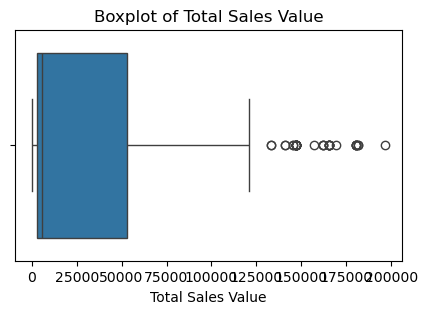

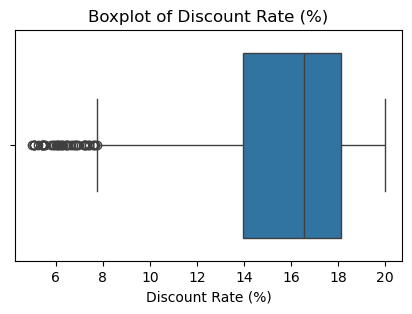

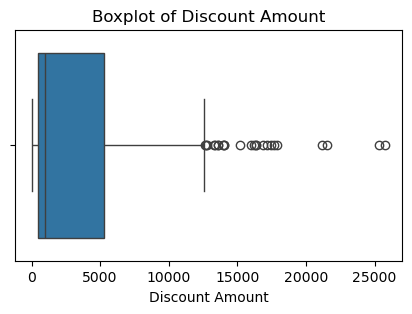

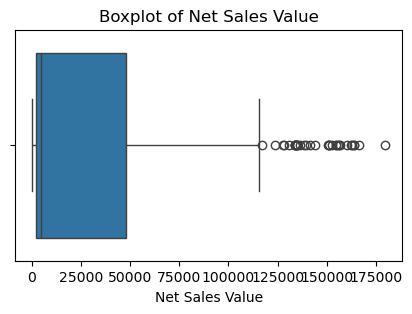

In [21]:
# 6. BOX PLOTS – TO IDENTIFY OUTLIERS


for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

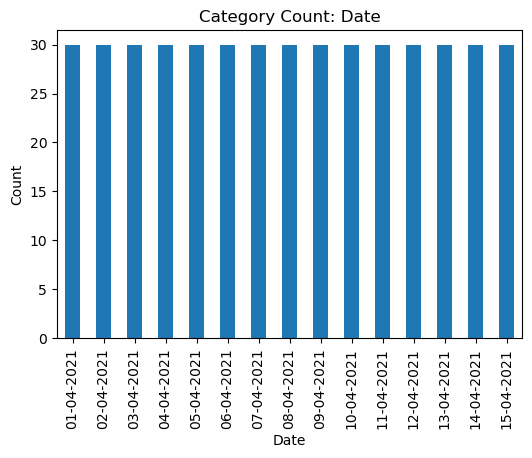

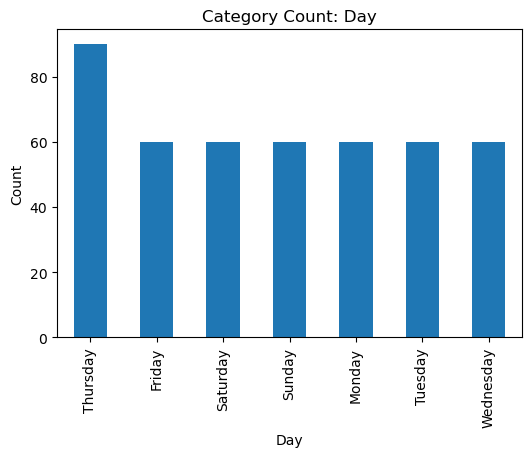

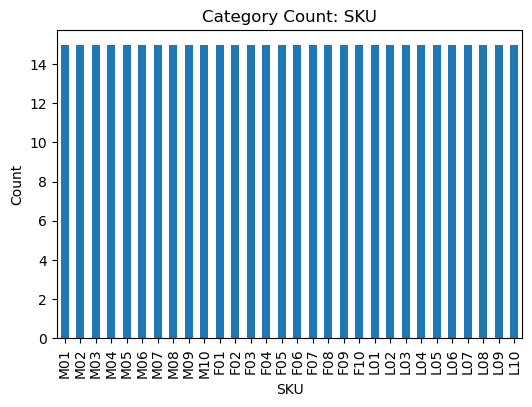

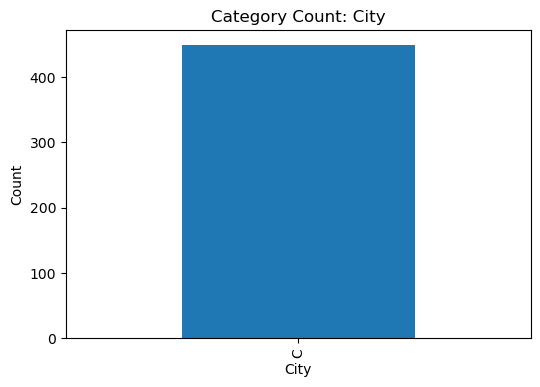

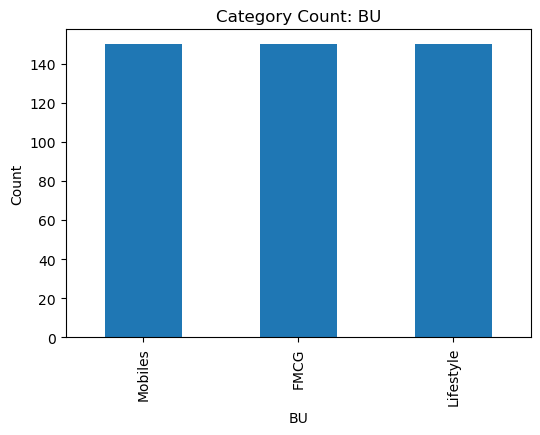

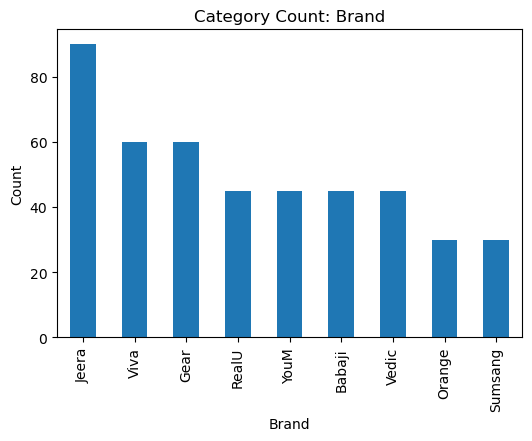

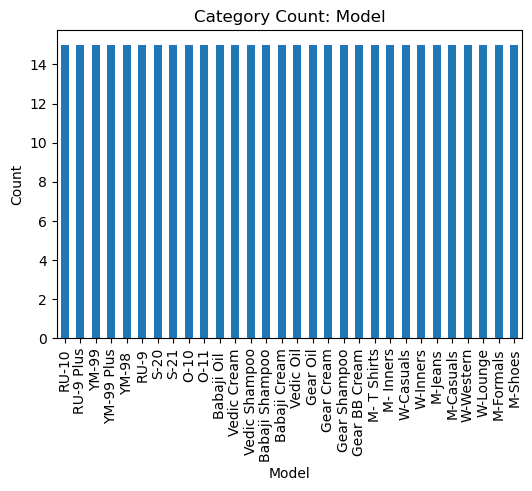

In [22]:
# 7. BAR CHARTS FOR CATEGORICAL COLUMNS


for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Category Count: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()